In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [5]:
plt.style.use('fivethirtyeight')

In [6]:
data = pd.read_csv('KNN_Project_Data')

In [7]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


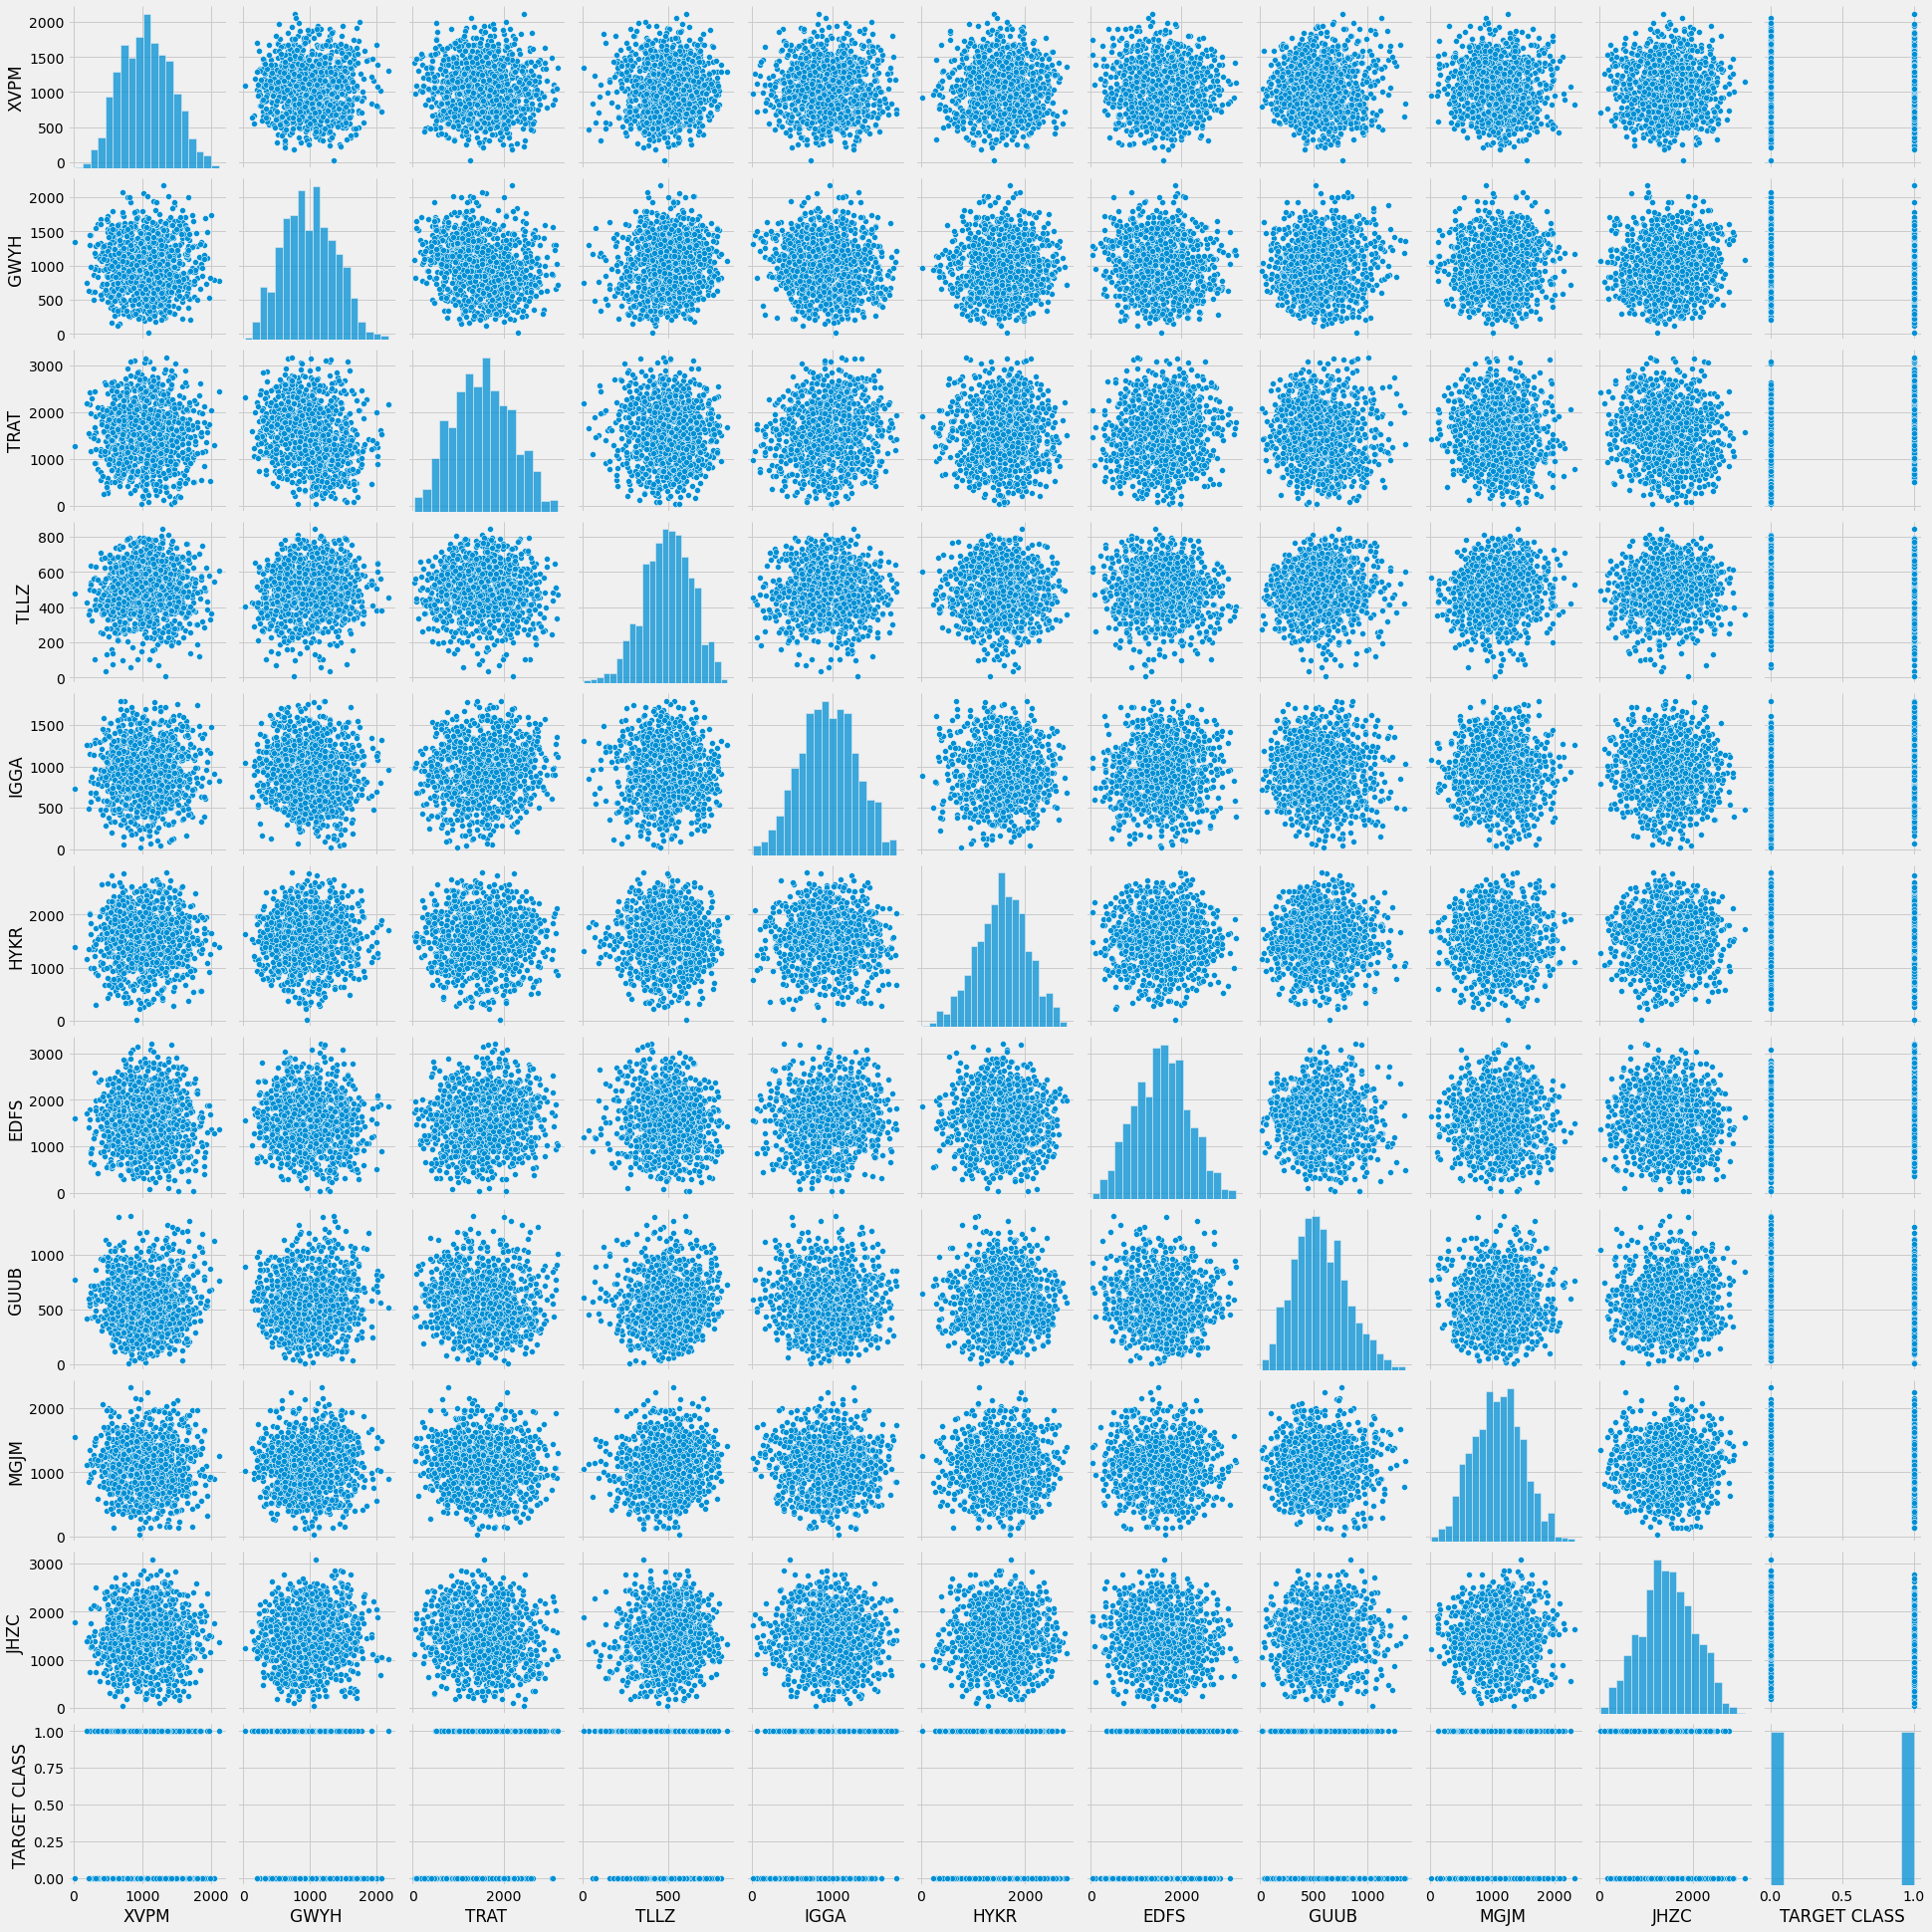

In [8]:
sns.pairplot(data)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(data.drop('TARGET CLASS', axis=1))

StandardScaler()

In [12]:
scaler_features = scaler.transform(data.drop('TARGET CLASS', axis=1))

In [13]:
scaler_features[1]

array([-0.11237594, -1.05657361,  1.7419175 , -1.50422015,  0.64000936,
        1.08155221, -1.18266332, -0.46186435,  0.25832069, -1.04154625])

In [14]:
df_feat = pd.DataFrame(data=scaler_features, columns=data.columns[:-1])

In [15]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_feat
y = data['TARGET CLASS']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
pred = knn.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(confusion_matrix(y_test, pred))

[[115  47]
 [ 48 120]]


In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       162
           1       0.72      0.71      0.72       168

    accuracy                           0.71       330
   macro avg       0.71      0.71      0.71       330
weighted avg       0.71      0.71      0.71       330



In [28]:
error_rate = []

for k_value in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train, y_train)
    pred_k_value = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_k_value != y_test))

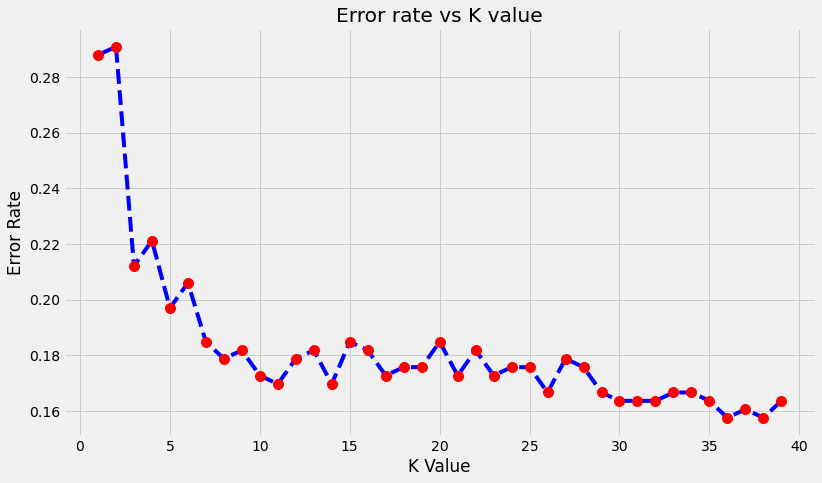

In [29]:
plt.figure(figsize=(12,7))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markeredgecolor='red', markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

plt.show()

In [30]:
knn = KNeighborsClassifier(n_neighbors=30)

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [32]:
prediction = knn.predict(X_test)

In [33]:
print(confusion_matrix(y_test, prediction))

[[135  27]
 [ 27 141]]


In [34]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       162
           1       0.84      0.84      0.84       168

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330

